# Deep Learning for Scratch  
Chapter 03 - Neural Network  
---   
2023-07-10 / Dohyeon Kwon

## 신경망(Neural Network)
퍼셉트론에 전달되는 가중치 매개변수 w의 적절한 값을 데이터를 통해 자동으로 학습하도록 설계한 네트워크.  
- 입력(x)들이 들어오는 입력층  
- 중간에서 연산을 진행하는 은닉층  
- 결과를 출력(y) 하는 출력층 으로 구성된다.   

뉴런의 층수는 은닉층을 0으로 하는 것 부터 시작한다.  
신경망의 층수는 보통 가중치를 가지는 층의 개수로 표현한다.  
(가장 큰 뉴런의 층으로 표현하는 논문도 있다.)

## 퍼셉트론의 이해
퍼셉트론을 이해하면 신경망도 쉽게 이해할 수 있다.  

$x_{1}$ 과 $x_{2}$ 를 입력받아 y를 출력하는 퍼셉트론의 수식   
$y = h(b+w_{1}x_{1}+w_{2}x_{2})$  
$h(x) =\begin{cases}0(x\leq 0) &\\ 1(x>0)\end{cases} $   

여기서 b는 뉴런이 얼마나 쉽게 활성화 되는지를 제어하는 편향(bias) 매개변수이다.   
$x_{1}$ 과 $x_{2}$ 는 각 신호의 영향력을 제어하는 신호의 가중치(weight) 매개변수이다.

수식을 퍼셉트론으로 보면
- $w_{1}$, $w_{2}$, $b$ 세 개의 신호가 입력층 뉴런에 각각 입력된다.
- 각 뉴런은 신호에 가중치를 곱해서 $y$ 뉴런으로 전달한다.  
- $y$ 뉴런은 전달받은 값을 모두 더하여 0을 초과하면 1을, 그렇지 않으면 0을 출력한다.  

$h(x)$는 $y$ 뉴런의 출력과 관련한 조건분기 동작을 하나의 함수로 나타낸 것이다.  
입력신호의 총합을 출력신호로 변환하는 함수 $h(x)$ 를 Activation Function 이라고 한다.



## 활성화 함수(Activation Function)
활성화 함수(Activation Function)는 입력신호의 총합이 활성화를 일으키는지 정하는 함수로서 크게 Step Function, Sigmoid Function, ReLU Function 등을 이용한다.  



### 계단 함수(Step Function)
퍼셉트론이 활성화를 일으키는 조건같이 임계값을 경계로 출력이 바뀌는 활성화 함수를 계단함수(Step Function) 라고 한다.  
__계단함수가 아닌 다른 활성화 함수를 이용함으로서 신경망이 구성된다.__


In [8]:
# 파라미터에 NumPy 배열이 들어와도 지원하도록 구현
import numpy as np

def step_function(x):
    # 1. 브로드캐스팅을 통해 Boolean 형태의 값이 대입됨.
    y = x > 0
    # 2. Boolean 원소를 int 자료형으로 형변환
    return y.astype(np.int)

/var/folders/n3/59lwl7pd3_bgg_m4z_47sdbw0000gn/T/ipykernel_1139/1969885309.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype=np.int)


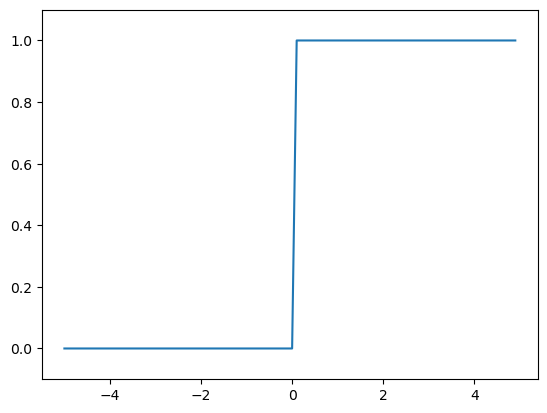

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 더 간결한 Step Func.
def step_function(x):
    # 새로운 NumPy 배열로 만들어서 반환.
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

### 시그모이드 함수(Sigmoid Function)  
신경망에서 자주 이용하는 활성화 함수로서 자연상수를 활용한다.  
$h(x) =  \frac{1}{1+e^{-x}}$  
자연상수는 자연의 연속적 성장을 표현하기 위한 상수로서 2.7182818284590452353602874 로 시작하는 무한소수이다.

## 3층 신경망의 구현

In [2]:
import numpy as np

# Activation Function - sigmiod func.
def sigmiod(x):
    return 1 / (1 + np.exp(-x))

def init_network():
    network = dict()
    network["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network["b1"] = np.array([0.1, 0.2, 0.3])
    network["W2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network["b2"] = np.array([0.1, 0.2])
    network["W3"] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network["b3"] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network["W1"], network["W1"], network["W1"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)

print(y)

NameError: name 'sigmoid' is not defined